In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = 'https://raw.githubusercontent.com/DrJieTao/ba545-docs/master/data/diabetes.csv'

df = pd.read_csv(data_path)
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


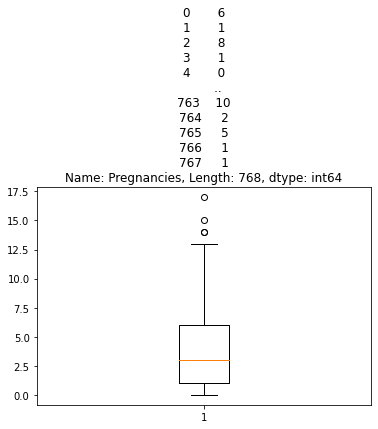

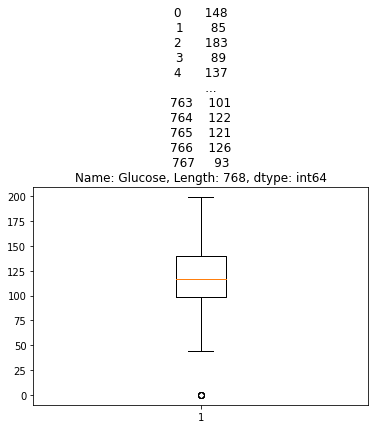

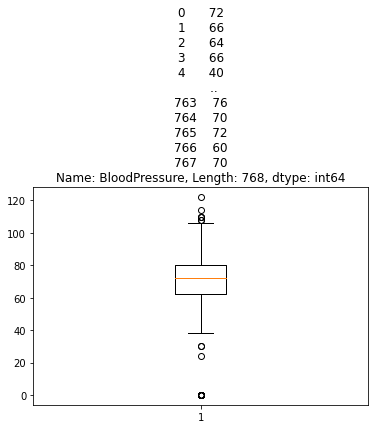

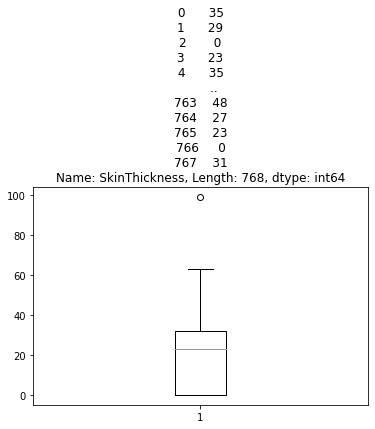

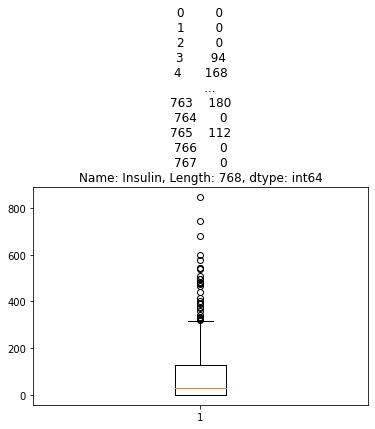

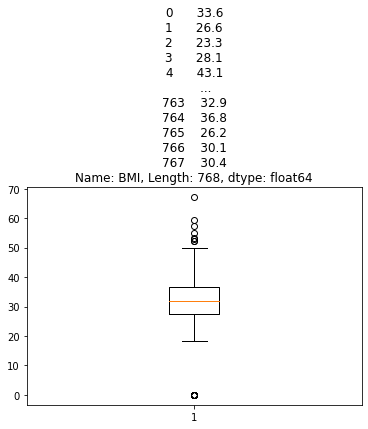

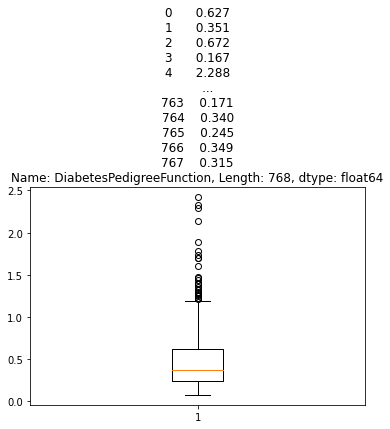

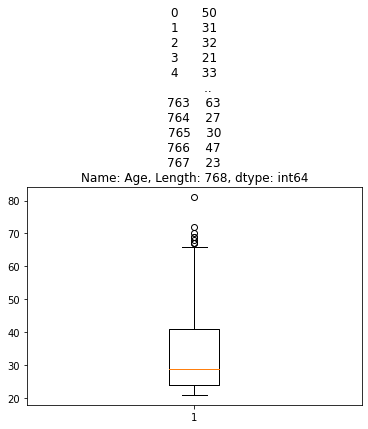

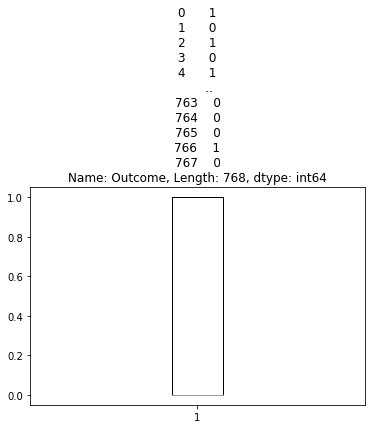

In [4]:
# to analyze outliers in the features 
# https://stackoverflow.com/questions/64383047/how-to-plot-the-boxplot-of-the-columns-in-one-loop
columns = df.columns
for col in columns:
    plt.figure() # create the figure for the visual 
    plt.boxplot(df[col])  # print a boxplot for each feature 
    plt.title(str(df[col])) # assign a title to each boxplot as the string of the column name 

**OUTLIER SUMMARY of DF Features**
* Pregnancies feature we have outliers in the upper range of values 
* Glucose feauture we have an outlier at zero value (this is a missing value because glucose cannot be zero)
* BloodPressure feature has outlier values in the lower and upper range of values 
* SkinThickness feature has one outlier at 100 value 
* Insulin feature has several outliers in the upper range of values 
* BMI feature has outliers in the upper range of features and a missing value at zero
* DiabetesPedigreeFunction has several outliers in the upper range of values 
* Age feature has outliers in the upper range of values
* Target feature is binary and no outliers 

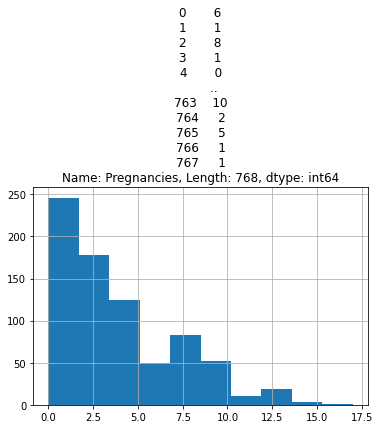

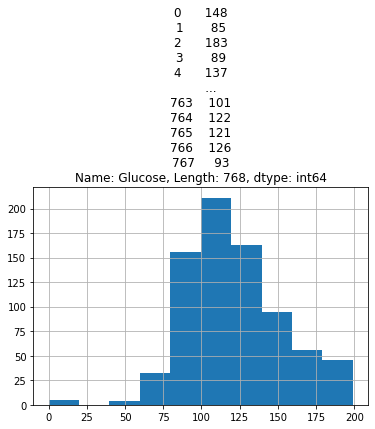

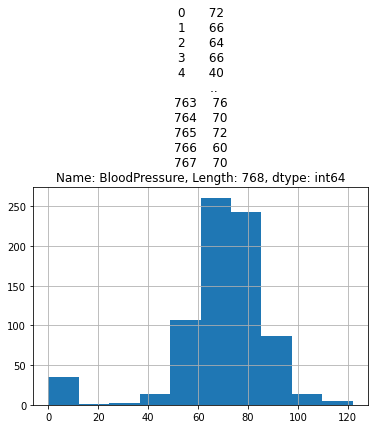

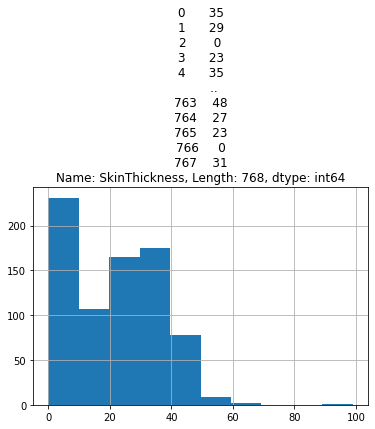

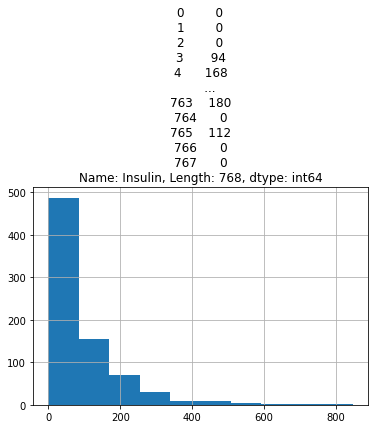

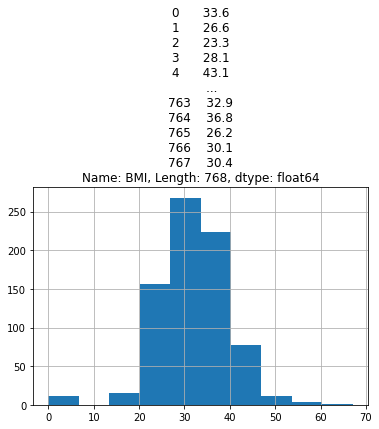

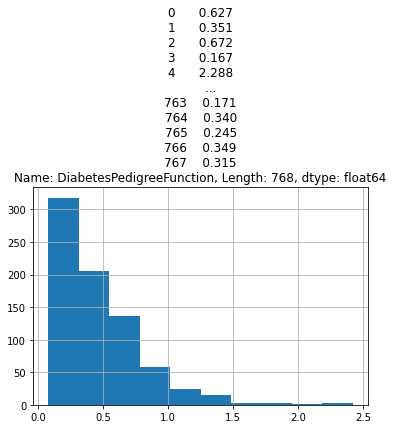

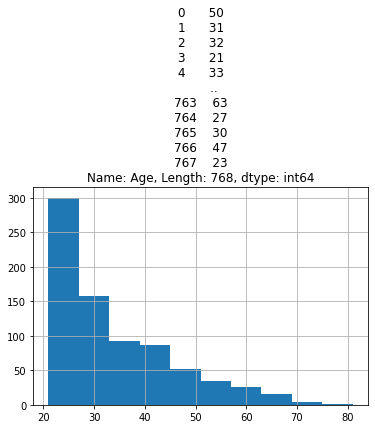

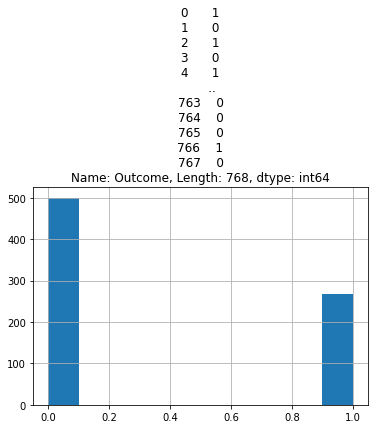

In [5]:
# Let's check the skewness of the features using histograms 
# all_data['CRIM'].hist()

for col in df.columns:
    plt.figure()
    df[col].hist()
    plt.title(str(df[col]))

**Skewness SUMMARY of DF Features**
* Pregnancies feature is right or possitively skewed
* Glucose feature is slightly left or negatively skewed (short tail on the left)
* Blood Pressure is slightly left or negatively skewed (short tail on the left)
* Skinthickness is right or possitively skewed 
* Insulin is right or possitively skewed
* BMI appears to be almost Gaussian or normal distribution 
* DiabetesPedigreeFunction is right or possitively skewed 
* Age is right or possitively skewed 
* Outcome of diabetes has inbalenced classes. More classes are 0 meaning the individual does not have diabetes.  We must use oversampling or undersampling to fix. 

POSSITIVELY/RIGHT skewed features we use log, square root, cube root, or 1/x transformation

NEGATIVELY/LEFT skewed features we use e^x, square, cube, yeojohnson, or boxcox transformation

In [6]:
#starting with one column
my_col = df.BMI
my_col.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [7]:
# getting the upper boundary using 3 standard deviation
# you should also get the lower boundary
# You can also set the boundaries using IQR
u_bound = my_col.mean() + 3* my_col.std()
print(u_bound)

55.64505908612634


In [8]:
# detecting any values are greater than the upper boundary
my_col[my_col>u_bound]

177    67.1
445    59.4
673    57.3
Name: BMI, dtype: float64

In [9]:
# Replace the values greater than the upper boundary with the upper boundary
my_col[my_col>u_bound] = u_bound

<ipython-input-9-5f7a82daea18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_col[my_col>u_bound] = u_bound


In [10]:
# verifying there is no value greater than the upper boundary
pd.Series(my_col>u_bound).value_counts()

False    768
Name: BMI, dtype: int64

In [11]:
# going for all the columns
for col in df.columns:
    u_bound = df[col].mean() + 3* df[col].std()
    df[col][df[col] > u_bound] = u_bound

<ipython-input-11-856196a33ff5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] > u_bound] = u_bound
<ipython-input-11-856196a33ff5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] > u_bound] = u_bound
<ipython-input-11-856196a33ff5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] > u_bound] = u_bound
<ipython-input-11-856196a33ff5>:4: SettingWithCopyWarning: 
A value is trying to be s